> Экспериментально определите, при каких количествах процессоров и работ (N и M) последовательный алгоритм ИО работает больше 1 минуты хотя бы с одним из законов понижения температуры.

N = 400, M = 34000

> С каким из законов понижения температуры на таких алгоритм работает дольше всего на таких "тяжёлых" входных данных? Находит ли он при этом лучшие решения, чем при других законах понижения температуры?

(фиксированная температура - 10)
- `boltzmann` - 73 секунды, 6095
- `cauchy` - не сошлось(прошло 5 минут), ~6300
- `log` - 64 секунды, 6225

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../launcher/out.csv")
df

,n,m,avg_time
0,100,30000,43.921050
1,100,31000,44.833326
2,100,32000,54.462102
3,100,33000,54.094169
4,100,34000,60.727271
5,100,35000,66.433558
6,100,36000,59.214983
7,100,37000,67.652219
8,200,30000,66.799064
9,200,31000,56.987104


In [3]:
pivoted_df = df.pivot(index="n", columns="m", values="avg_time")
pivoted_df

m,30000,31000,32000,33000,34000,35000,36000,37000
n,,,,,,,,
100,43.921050,44.833326,54.462102,54.094169,60.727271,66.433558,59.214983,67.652219
200,66.799064,56.987104,65.523793,65.729736,77.438928,71.459830,81.358259,89.439444
300,59.833982,80.382295,82.934970,77.078146,88.475241,86.117835,72.932067,86.076519
400,46.826600,45.462871,66.405636,51.101268,67.907165,77.548107,76.738761,84.320438
500,46.063306,64.182639,55.901099,62.125295,78.067799,82.535605,62.337766,80.447835
600,49.350687,58.124461,67.063667,77.451820,45.769329,83.248234,71.391951,57.972255


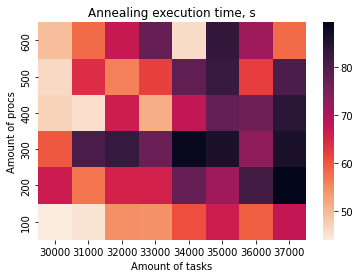

In [4]:
sns.heatmap(pivoted_df.sort_values(by=["n"], ascending=False), cmap=sns.cm.rocket_r)
plt.title("Annealing execution time, s")
plt.ylabel("Amount of procs")
plt.xlabel("Amount of tasks")
plt.show()

In [5]:
parallel_df = pd.read_csv("../launcher/out_parall.csv")

In [6]:
parallel_df

,procs,tasks,time,n
0,400,34000,74.051135,1
1,400,34000,60.290934,2
2,400,34000,49.215668,4
3,400,34000,95.239362,8
4,400,34000,110.864348,16


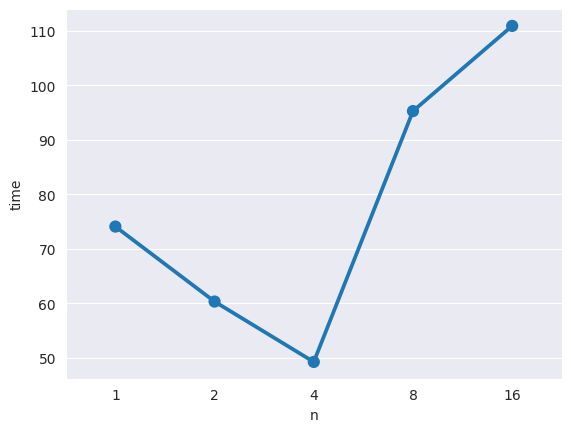

In [23]:
sns.set_style("darkgrid")
sns.pointplot(data=parallel_df, x="n", y="time")
plt.xlabel("Amount of processors")
plt.ylabel("Average time")
plt.show()